# US_Visa Prediction Project

 ### About
 The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

 ### Importing Neccessary Liabrary 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### Import CSV Datasets

In [2]:
df=pd.read_csv("Visadataset.csv")

In [3]:
# First five rows of the df
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Summary of df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Differentiation of columns according to dtype

In [5]:
object_columns=df.select_dtypes(include=['object'])
Num_columns=df.select_dtypes(include=['float','int'])

In [6]:
# Print all object columns
object_columns

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,South,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,West,Year,Y,Certified


In [7]:
# Print all numeric columns
Num_columns

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


### Unique value sum of object column

In [8]:
for i in object_columns:
    print(df[i].value_counts())
    print("==================")

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied   

### Univarent Analysis :  Univariate analysis involves the exploration of a single variable at a time.

In [9]:
# Drop case_id column
df=df.drop(columns='case_id')

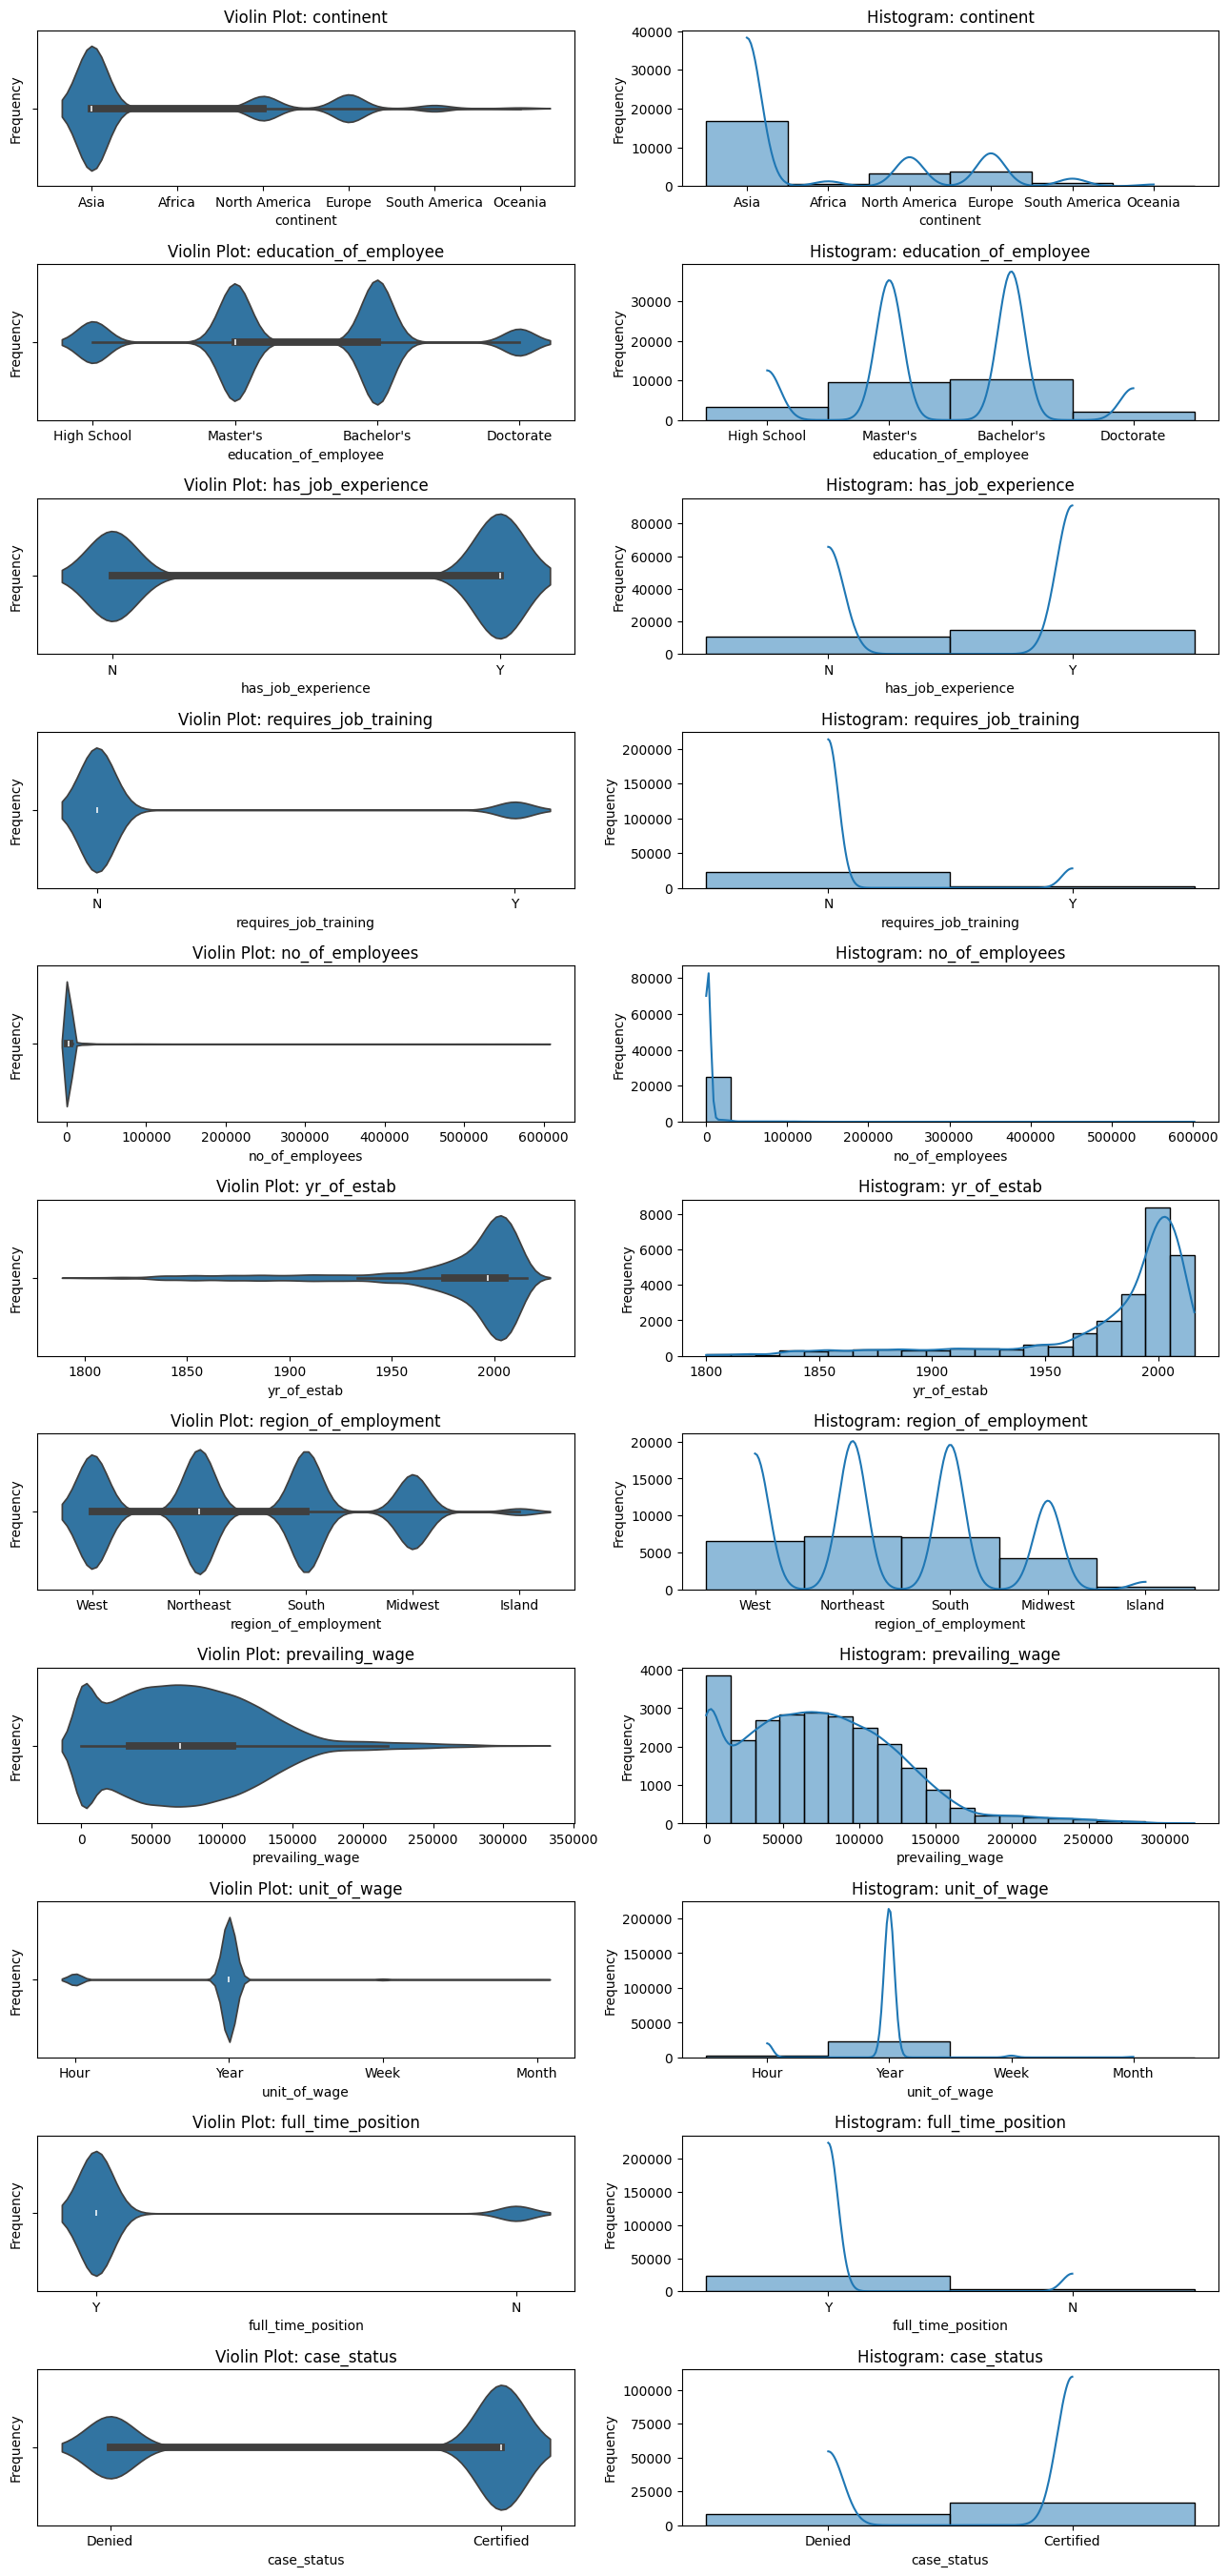

In [10]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(16, 34))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plot Violin Plots
for i, col in enumerate(df.columns):
    sns.violinplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Violin Plot: {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

# Plot Histograms
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram: {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.show()

### Bivariate Analysis:Bivariate analysis explores the relationship between two variables.

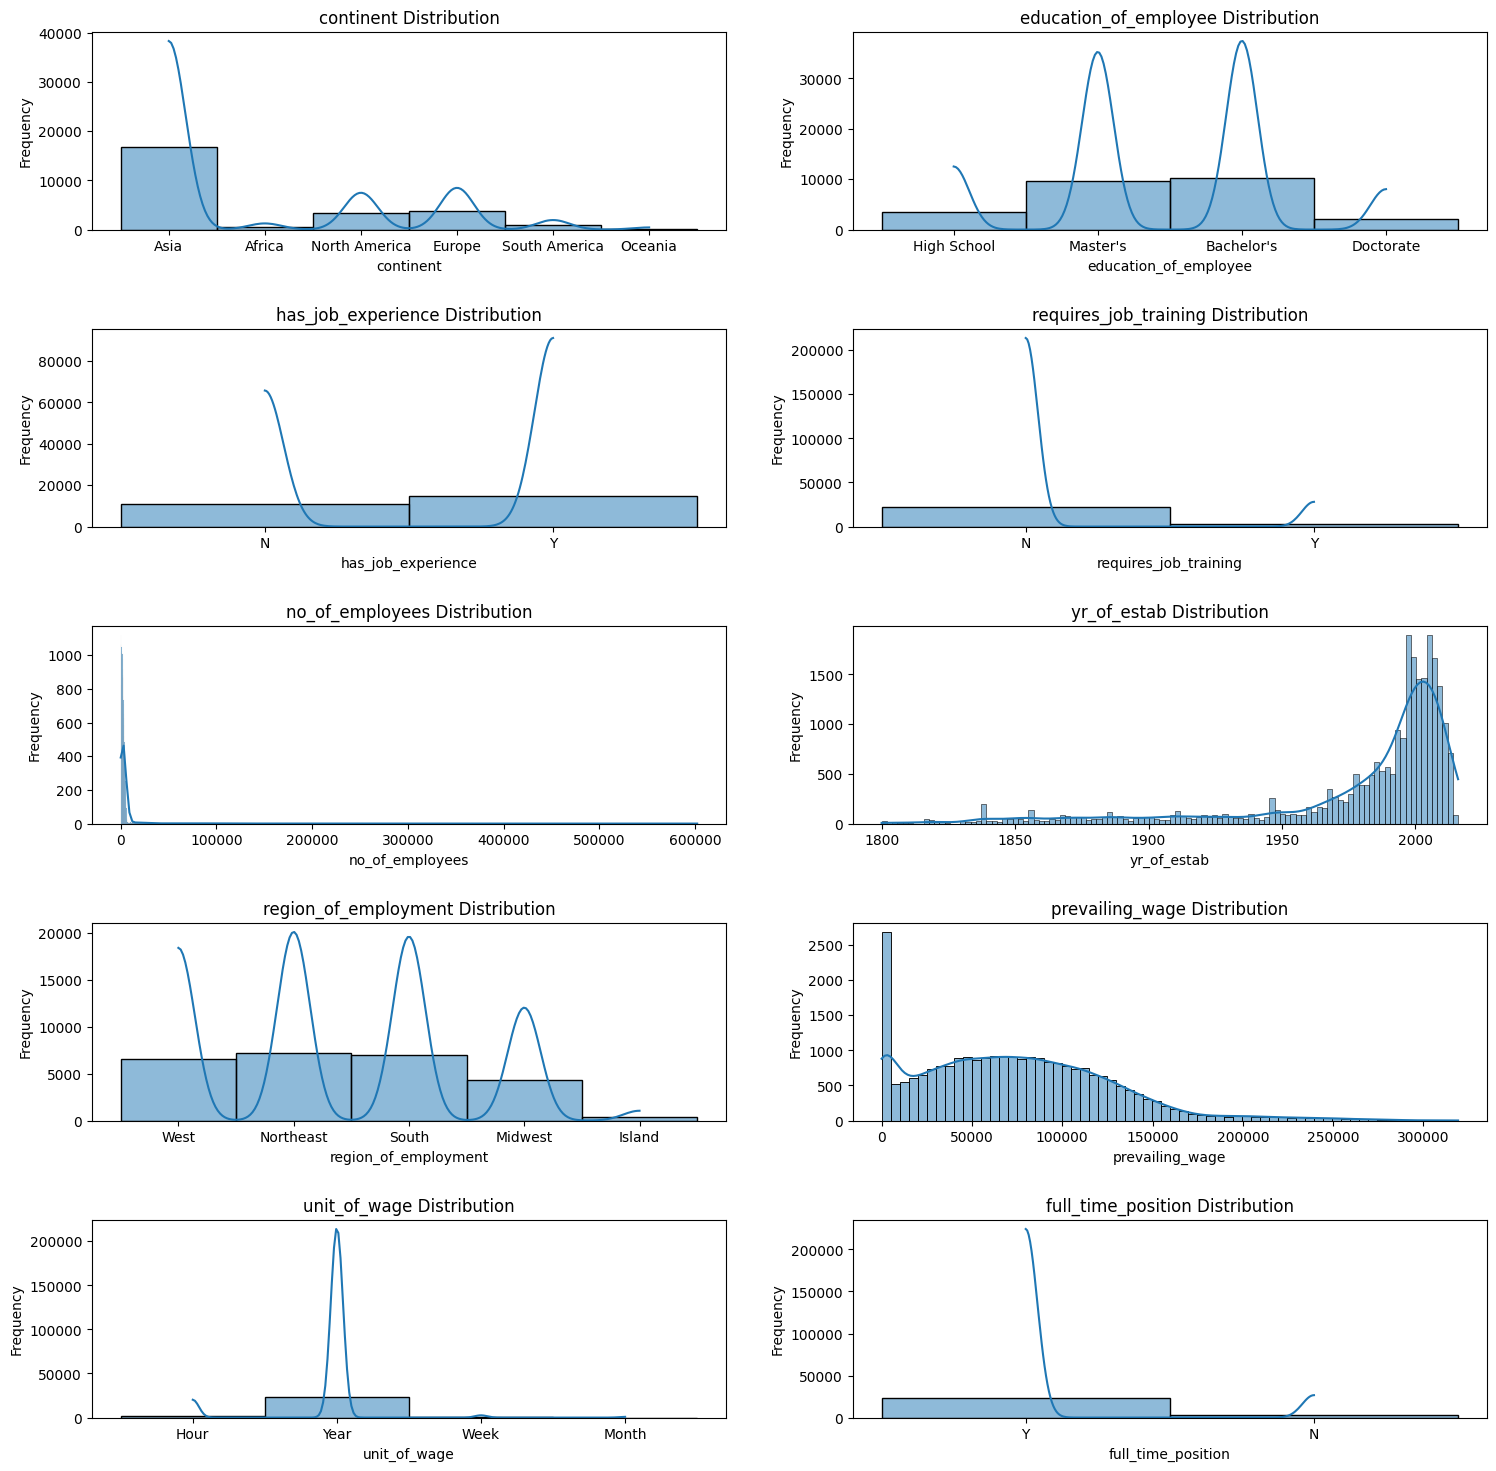

In [11]:
object_columns = df.copy()  # Making a copy of DataFrame

fig, axes = plt.subplots(nrows=len(object_columns.columns[:-1]) // 2, ncols=2, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for ax, col in zip(axes.flatten(), object_columns.columns[:-1]):
    sns.histplot(x=col, data=object_columns, ax=ax, kde=True)  # Change to histplot
    ax.set_title(f'{col} Distribution')  # Adjust title
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')  # Change ylabel

plt.show()

### Conversion object column into int
we can use Scikit-learn's LabelEncoder to convert object columns (containing strings) into integer labels. Here's we can do it for all object columns in our dataframe:

In [12]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Iterating over each object column and transforming it
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [13]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,5853,189,4,1587,0,1,1
1,1,3,1,0,2391,184,2,15091,3,1,0
2,1,0,0,1,6495,190,4,21194,3,1,1
3,1,0,0,0,87,79,4,15095,3,1,1
4,0,3,1,0,1069,187,3,23611,3,1,0


### Correlation Matrix:
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The correlation coefficient indicates the strength and direction of the relationship between two variables.

In [14]:
# Calculate correlation matrix
correlation_matrix = df.corr()['case_status']

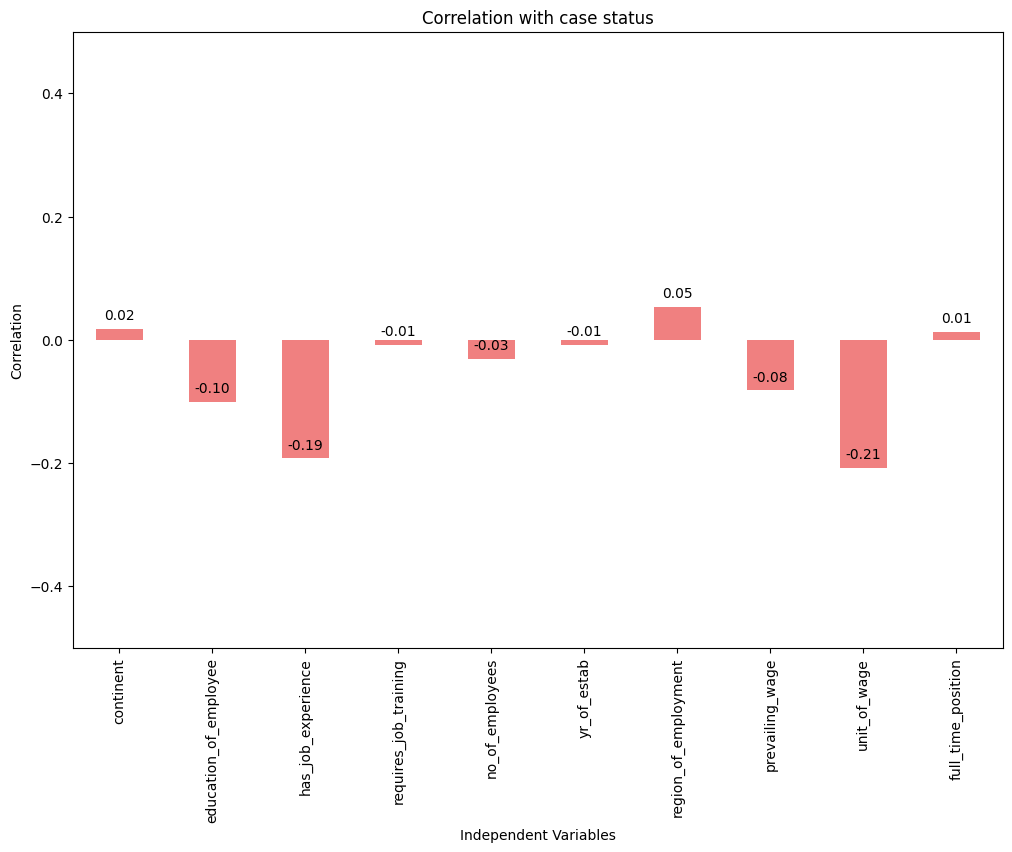

In [15]:
correlation_matrix=correlation_matrix.drop('case_status')
# Plot a bar graph for correlation with the dependent variable
plt.figure(figsize=(12, 8))
ax = correlation_matrix.plot(kind='bar', color='lightcoral')
plt.title('Correlation with case status')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation')
plt.ylim(-0.50, 0.50)  # Adjust the limits as needed

# Add annotations
for i, value in enumerate(correlation_matrix):
    ax.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Boxplot:

A box plot, also known as a box-and-whisker plot, is a graphical representation of a dataset's distribution, particularly focusing on the central tendency and spread of the data. It provides a visual summary of key statistical measures such as the median, quartiles, and potential outliers.

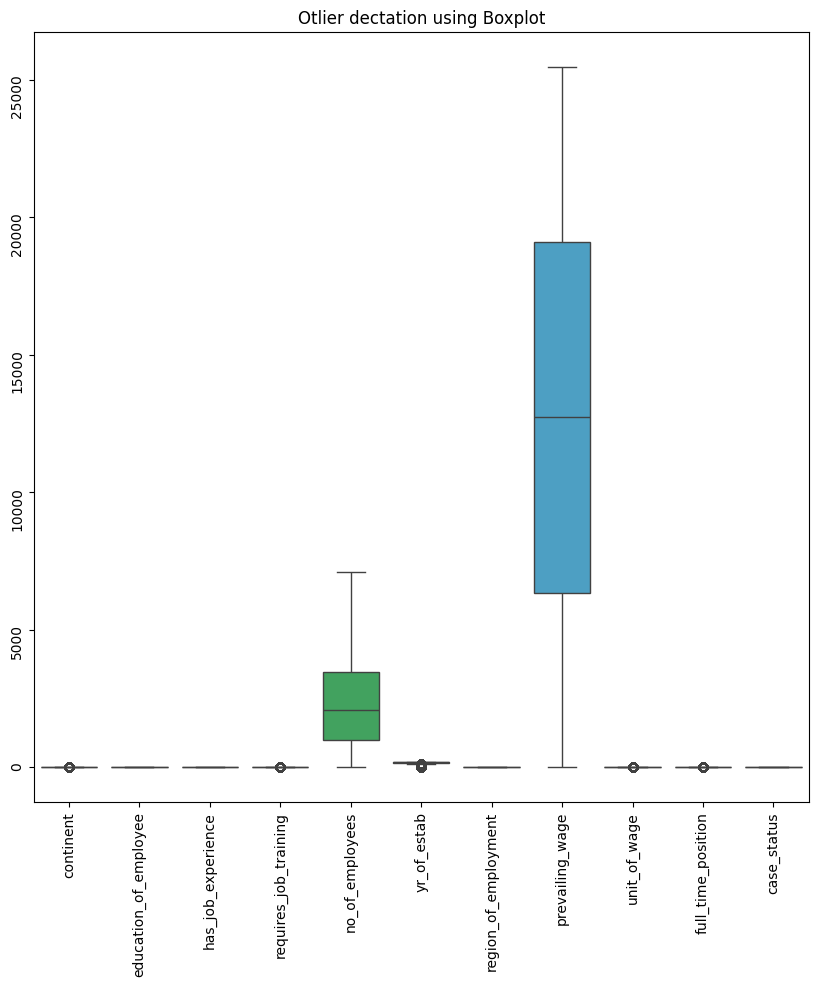

Outliers detected using IQR method:
121      5
130      5
171      5
188      5
224      5
        ..
25404    4
25405    4
25413    5
25444    5
25455    5
Name: continent, Length: 1044, dtype: int32
Outliers detected using IQR method:
Series([], Name: education_of_employee, dtype: int32)
Outliers detected using IQR method:
Series([], Name: has_job_experience, dtype: int32)
Outliers detected using IQR method:
2        1
14       1
27       1
37       1
38       1
        ..
25460    1
25462    1
25467    1
25475    1
25478    1
Name: requires_job_training, Length: 2955, dtype: int32
Outliers detected using IQR method:
Series([], Name: no_of_employees, dtype: int64)
Outliers detected using IQR method:
3         79
7        106
23        66
31        62
38        91
        ... 
25445     72
25463     21
25467     64
25477     92
25478     69
Name: yr_of_estab, Length: 3260, dtype: int64
Outliers detected using IQR method:
Series([], Name: region_of_employment, dtype: int32)
Outliers de

In [16]:
# Boxplot to visualize outliers for a specific column
plt.figure(figsize=(10, 10))
sns.boxplot(df)
plt.title('Otlier dectation using Boxplot')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

# Outlier detection using IQR method
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

for col in df.columns:
    outliers_iqr = identify_outliers_iqr(df[col])
    print("Outliers detected using IQR method:")
    print(df[outliers_iqr][col])
    print("============================================")


### Skwness:
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In simpler terms, it tells you the extent to which a distribution is not symmetric.

Skewness: continent                1.740705
education_of_employee   -0.005145
has_job_experience      -0.328049
requires_job_training    2.398862
no_of_employees          0.722346
yr_of_estab             -2.001936
region_of_employment    -0.204321
prevailing_wage          0.000104
unit_of_wage            -2.864239
full_time_position      -2.555831
case_status              0.713026
dtype: float64


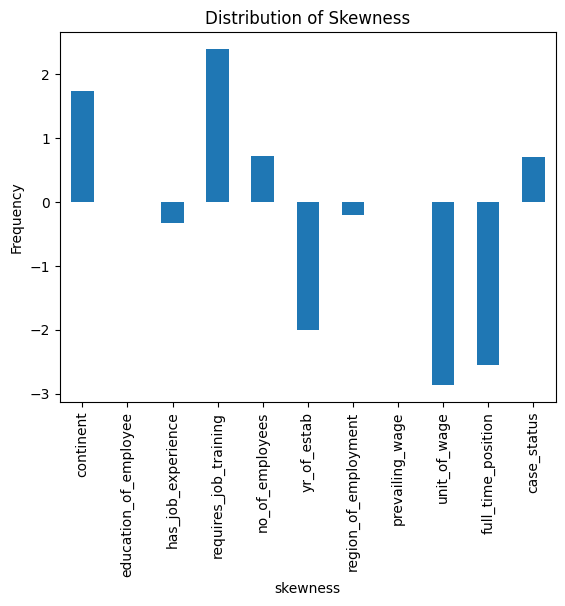

In [17]:
# Display skewness value
skewness = df.skew()
print(f"Skewness: {skewness}")
# Plot a histogram to check the skewness of a specific column
ax=skewness.plot(kind='bar')
plt.title(f'Distribution of Skewness')
plt.xlabel('skewness')
plt.ylabel('Frequency')
plt.show()

### Scaling:
Scaling, in the context of machine learning and data preprocessing, refers to the process of transforming numerical features to a standard range or distribution. Scaling is crucial in machine learning because it helps in improving the performance and convergence of many optimization algorithms.

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Specify the features to be scaled (exclude the dependent variable)
features_to_scale = df.columns[:-1]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df[features_to_scale]), columns=features_to_scale)

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df[features_to_scale]), columns=features_to_scale)

# Display the scaled datasets
print("Min-Max Scaled Dataset:\n")
print(df_minmax.head())
print("===========================================================================")
print("\nStandard Scaled Dataset:\n")
print(df_standard.head())

Min-Max Scaled Dataset:

   continent  education_of_employee  has_job_experience  \
0        0.2               0.666667                 0.0   
1        0.2               1.000000                 1.0   
2        0.2               0.000000                 0.0   
3        0.2               0.000000                 0.0   
4        0.0               1.000000                 1.0   

   requires_job_training  no_of_employees  yr_of_estab  region_of_employment  \
0                    0.0         0.823902     0.954545                  1.00   
1                    0.0         0.336571     0.929293                  0.50   
2                    1.0         0.914274     0.959596                  1.00   
3                    0.0         0.012247     0.398990                  1.00   
4                    0.0         0.150479     0.944444                  0.75   

   prevailing_wage  unit_of_wage  full_time_position  
0         0.062350           0.0                 1.0  
1         0.592897           

### Visualize df after scaling normalize or not

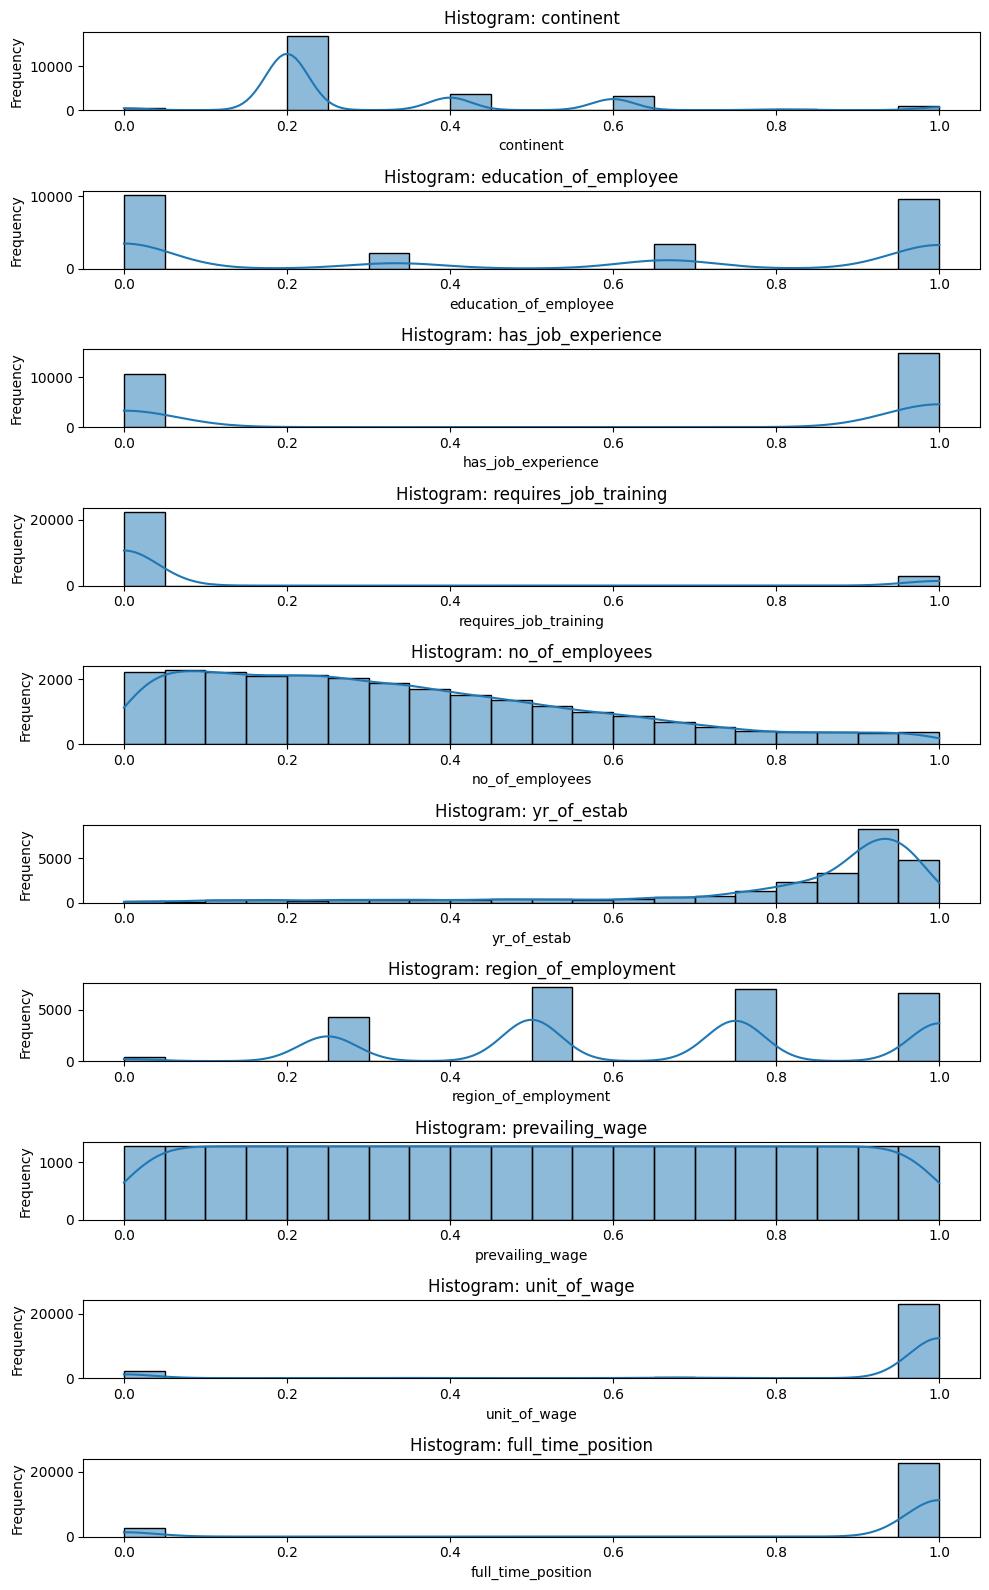

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=len(df_minmax.columns), ncols=1, figsize=(10,16))

# Plot Histograms
for i, col in enumerate(df_minmax.columns):
    sns.histplot(df_minmax[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Power Transforms:
Power transformation is a technique used to stabilize the variance and make the data more Gaussian-like. It's particularly useful when dealing with data that exhibits heteroscedasticity, where the variance of the data is not constant across the range of values.

In [44]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
columns_to_transform = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position']
pt.fit(df_minmax[columns_to_transform])
df_tran=pt.transform(df_minmax[columns_to_transform])

In [45]:
df_tran

array([[-0.49950534,  0.4580997 , -1.17737617, ..., -1.54766891,
        -3.03973573,  0.3447736 ],
       [-0.49950534,  1.09671533,  0.84934622, ...,  0.34333991,
         0.33109332,  0.3447736 ],
       [-0.49950534, -1.12772067, -1.17737617, ...,  1.14344639,
         0.33109332,  0.3447736 ],
       ...,
       [-0.49950534,  1.09671533,  0.84934622, ...,  1.42553574,
         0.33109332, -2.90045409],
       [-0.49950534,  1.09671533,  0.84934622, ...,  0.40651698,
         0.33109332,  0.3447736 ],
       [-0.49950534, -1.12772067,  0.84934622, ...,  0.03747843,
         0.33109332,  0.3447736 ]])

In [53]:
df_tran = pd.DataFrame(df_tran, columns=columns_to_transform)


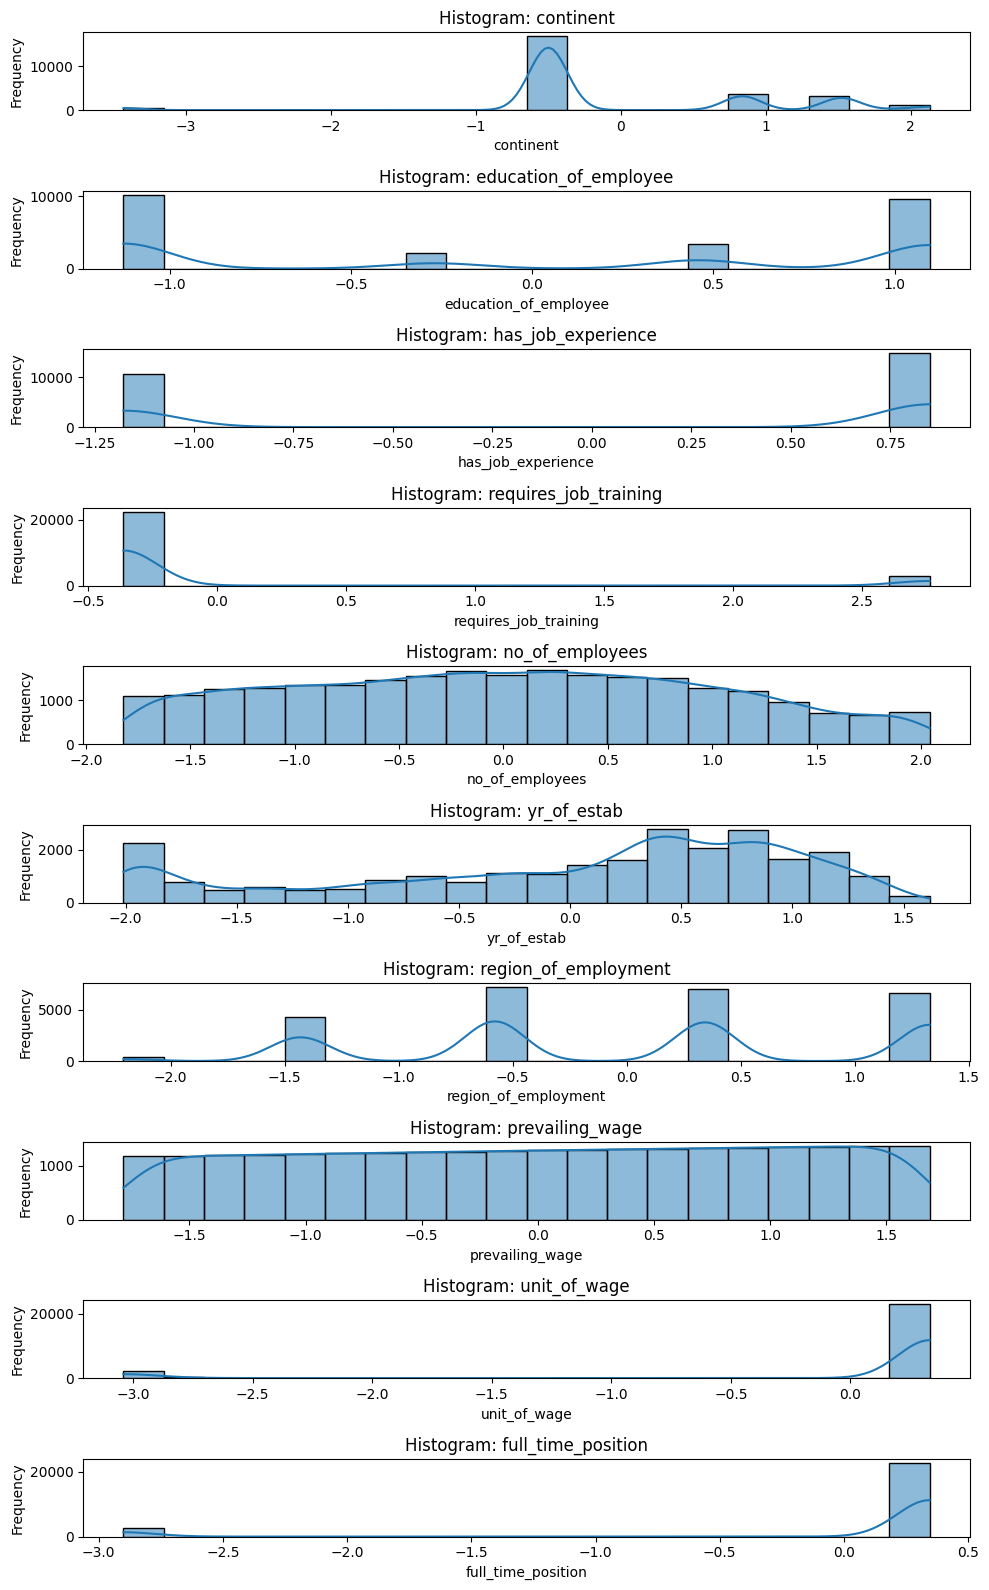

In [54]:
# Create subplots
fig, axes = plt.subplots(nrows=len(df_tran.columns), ncols=1, figsize=(10,16))

# Plot Histograms
for i, col in enumerate(df_tran.columns):
    sns.histplot(df_tran[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [55]:
df_tran['target']=df['case_status'].copy()

"After undergoing a power transformation, the data has been harmonized, revealing a Gaussian-like distribution that enhances the performance of statistical models by mitigating heteroscedasticity and stabilizing variance."

### Train a model

### SMOTE-ENN:
SMOTE-ENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbors) is a hybrid resampling technique used to address class imbalance problems in supervised learning. It combines two popular techniques: SMOTE (Synthetic Minority Over-sampling Technique) and Edited Nearest Neighbors (ENN).

In [57]:
from imblearn.combine import SMOTEENN

# Assuming df_tran is your DataFrame containing the transformed data
X = df_tran.drop('target', axis=1)  # Assuming 'target_column' is your target variable
y = df_tran['target']

# Initialize SMOTE-ENN
smote_enn = SMOTEENN()

# Apply SMOTE-ENN to the data
X_res, y_res = smote_enn.fit_resample(X, y)

In [58]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13524, 10), (3381, 10))

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [60]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [61]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [62]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [63]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9506
- F1 score: 0.9554
- Precision: 0.9496
- Recall: 0.9613
- Roc Auc Score: 0.9494


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9113
- F1 score: 0.9196
- Precision: 0.9176
- Recall: 0.9216
- Roc Auc Score: 0.9101


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8849
- F1 score: 0.8955
- Precision: 0.8947
- Recall: 0.8963
- Roc Auc Score: 0.8836
----------------------------------
Model performance for Test set
- Accuracy: 0.8915
- F1 score: 0.9015
- Precision: 0.9012
- Recall: 0.9017
- Roc Auc Score: 0.8903


Logistic Regression
Model performance for Training 

d:\Inside AIML\US_visa_prediction\visa\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8523
- F1 score: 0.8656
- Precision: 0.8672
- Recall: 0.8639
- Roc Auc Score: 0.8510
----------------------------------
Model performance for Test set
- Accuracy: 0.8672
- F1 score: 0.8796
- Precision: 0.8784
- Recall: 0.8808
- Roc Auc Score: 0.8657




In [64]:
base_model_report


,Model Name,Accuracy
0,Random Forest,0.950606
6,CatBoosting Classifier,0.929015
4,K-Neighbors Classifier,0.926353
5,XGBClassifier,0.926057
1,Decision Tree,0.911269
2,Gradient Boosting,0.891452
8,AdaBoost Classifier,0.867199
7,Support Vector Classifier,0.825791
3,Logistic Regression,0.719610


### Random forest have best accuracy and we can use for hyperparameter tuning

In [65]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [66]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [67]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

d:\Inside AIML\US_visa_prediction\visa\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


d:\Inside AIML\US_visa_prediction\visa\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


d:\Inside AIML\US_visa_prediction\visa\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


### Retraining the model with the best parameters

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9518
- F1 score: 0.9565
- Precision: 0.9497
- Recall: 0.9635
- Roc Auc Score: 0.9505


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9613
- F1 score: 0.9653
- Precision: 0.9529
- Recall: 0.9780
- Roc Auc Score: 0.9594


XGBClassifier
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9997
- Recall: 1.0000
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.9373
- F1 score: 0.9434
- Precision: 0.9374
- Recall: 0.9495
- Roc Auc Score: 0.9359




In [69]:
tuned_report


,Model Name,Accuracy
1,KNeighborsClassifier,0.961254
0,Random Forest Classifier,0.951789
2,XGBClassifier,0.937297


In [70]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9613
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1519
           1       0.95      0.98      0.97      1862

    accuracy                           0.96      3381
   macro avg       0.96      0.96      0.96      3381
weighted avg       0.96      0.96      0.96      3381



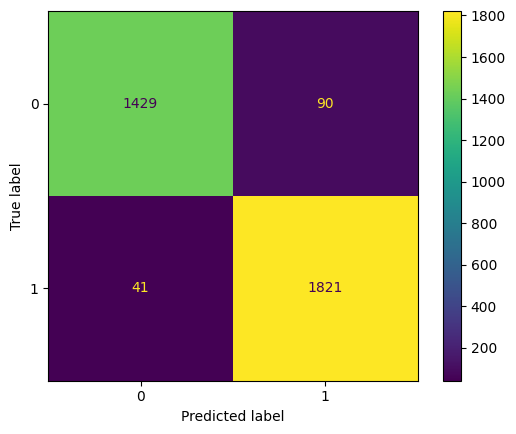

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

# Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.66%